# Prodigy InfoTech Task 2






## Import libraries

In [215]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

## Load the data


In [216]:
data = pd.read_csv('Mall_Customers.csv')

## The first 10 raws of the data

In [217]:
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


## Number of raws and columns in the data

In [218]:
data.shape

(200, 5)

## Some statistical information about the data

In [219]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Number of nulls in each column

In [220]:
for col in data.columns:
    print(f'{col} : {data[col].isna().sum()} out of {data.shape[0]}')

CustomerID : 0 out of 200
Gender : 0 out of 200
Age : 0 out of 200
Annual Income (k$) : 0 out of 200
Spending Score (1-100) : 0 out of 200


## Fetch the categorical columns

In [221]:
categorical_columns = []
for i in data.columns:
    if data[i].dtype == 'object':
        categorical_columns.append(i)
print(categorical_columns)

['Gender']


## The task is to Create a K-means clustering algorithm to group customers of a retail store based on their purchase history

## Encoding the categorical columns

In [222]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
# replace male with 0 and female with 1

## Standardizing features

In [223]:
# Select features for clustering (Age, Annual Income, Spending Score)
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
# Customer ID column is dropped

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])
scaled_data = pd.DataFrame(scaled_data, columns=features)

## Print data after preprocessing

In [224]:
scaled_data.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
5,-1.209269,-1.662660,1.001596
6,-0.276302,-1.624491,-1.715913
7,-1.137502,-1.624491,1.700384
8,1.804932,-1.586321,-1.832378
9,-0.635135,-1.586321,0.846310


## Elbow method

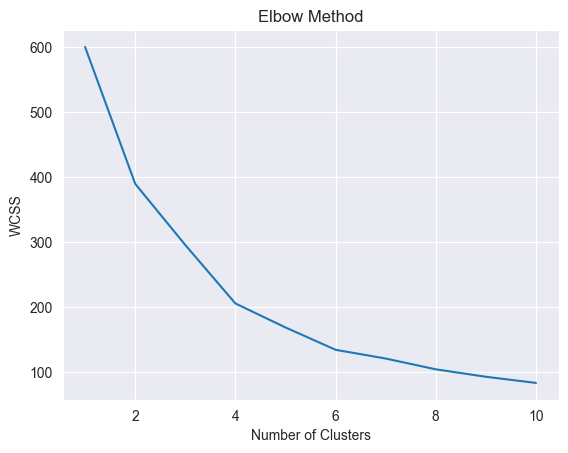

In [225]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)  # Sum of squared distances of samples to their closest cluster center

# Elbow graph to determine the optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()

### From the Elbow method we can notice that the suitable number of clusters is 5

## K-Means clustering and PCA for Dimensionality Reduction

In [226]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])

# Apply KMeans clustering on the PCA-reduced data
kmeans = KMeans(n_clusters=5, random_state=42)
pca_df['Cluster'] = kmeans.fit_predict(pca_data)

## Visualization of Clusters and centroids

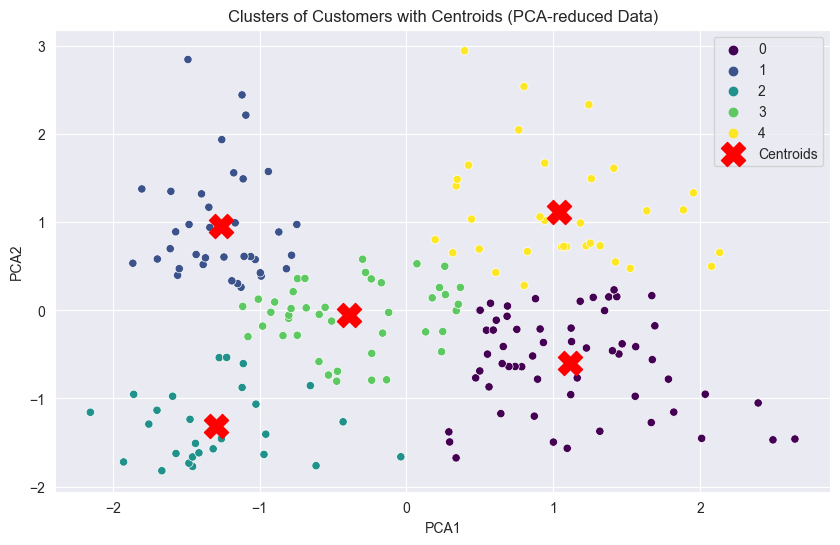

In [227]:
centroids = kmeans.cluster_centers_

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis')

plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids', marker='X')

plt.title('Clusters of Customers with Centroids (PCA-reduced Data)')
plt.legend()
plt.show()

### *I hope this notebook was useful.*


#### reach me via : https://www.linkedin.com/in/ehab-mahmoud-ali-77ab0a243/